In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

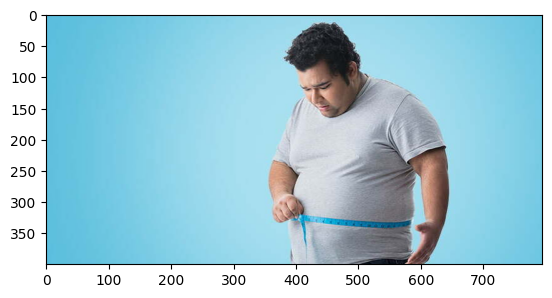

In [153]:
data='/content/dataset-cover.jpg'
img=Image.open(data)
plt.imshow(img)

The Obesity Prediction Dataset provides a comprehensive collection of attributes related to individuals' demographics, lifestyle habits, and health indicators, aimed at facilitating the prediction of obesity prevalence. This dataset offers a valuable resource for researchers, data scientists, and healthcare professionals interested in exploring the complex interplay of factors contributing to obesity and developing effective intervention strategies.

In [154]:
df=pd.read_csv('/content/obesity_data.csv')

In [155]:
df.shape

(1000, 7)

In [156]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [157]:
df['ObesityCategory'].value_counts()

Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: ObesityCategory, dtype: int64

In [158]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

<Axes: xlabel='count', ylabel='ObesityCategory'>

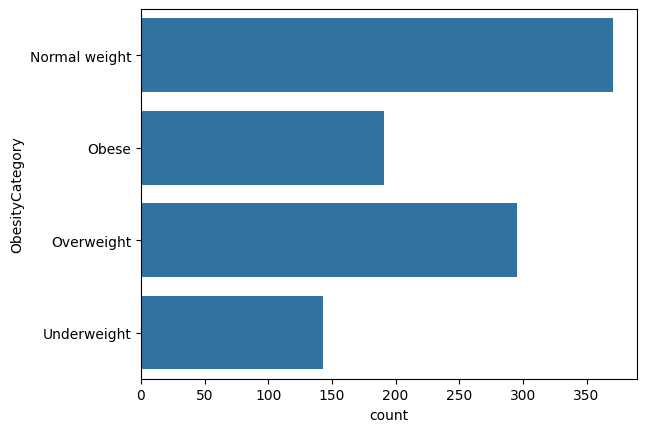

In [159]:
sns.countplot(df['ObesityCategory'])

In [160]:
column=df.columns
column

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [162]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [163]:
for i in column:
  print(f'{i}:{df[i].unique()}')

Age:[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 57 20 39 19 61 47 55 77 50
 29 42 66 44 76 59 45 33 79 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34
 23 71 51 27 48 65 62 58 18 22 30 49 73 63]
Gender:['Male' 'Female']
Height:[173.57526244 164.12730582 168.07220213 168.45963284 183.56856774
 166.40562726 183.56633382 142.87509508 183.47855781 182.97406115
 179.02254673 149.88081997 180.18886995 169.49880824 144.7066256
 182.98177708 184.44173079 150.95487928 171.75421075 183.88591121
 182.30161313 178.36061051 143.5274712  177.29542767 167.81896102
 179.95857529 172.56161458 169.8011839  176.40903849 168.28086629
 169.7572272  164.44776001 153.94591009 175.67853474 161.9396968
 167.99208134 172.86973958 149.14782356 151.38651096 167.00261423
 174.54563482 177.44038271 154.08685504 176.36631484 167.54930382
 161.16842755 163.51448144 178.01857332 172.74005785 170.50306523
 172.43495739 179.28097777 169.02900433 170.54318886 181.3817074
 166.68413376 176.18140595 164.96295519 165.8413265

In [164]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


<Axes: xlabel='Age', ylabel='count'>

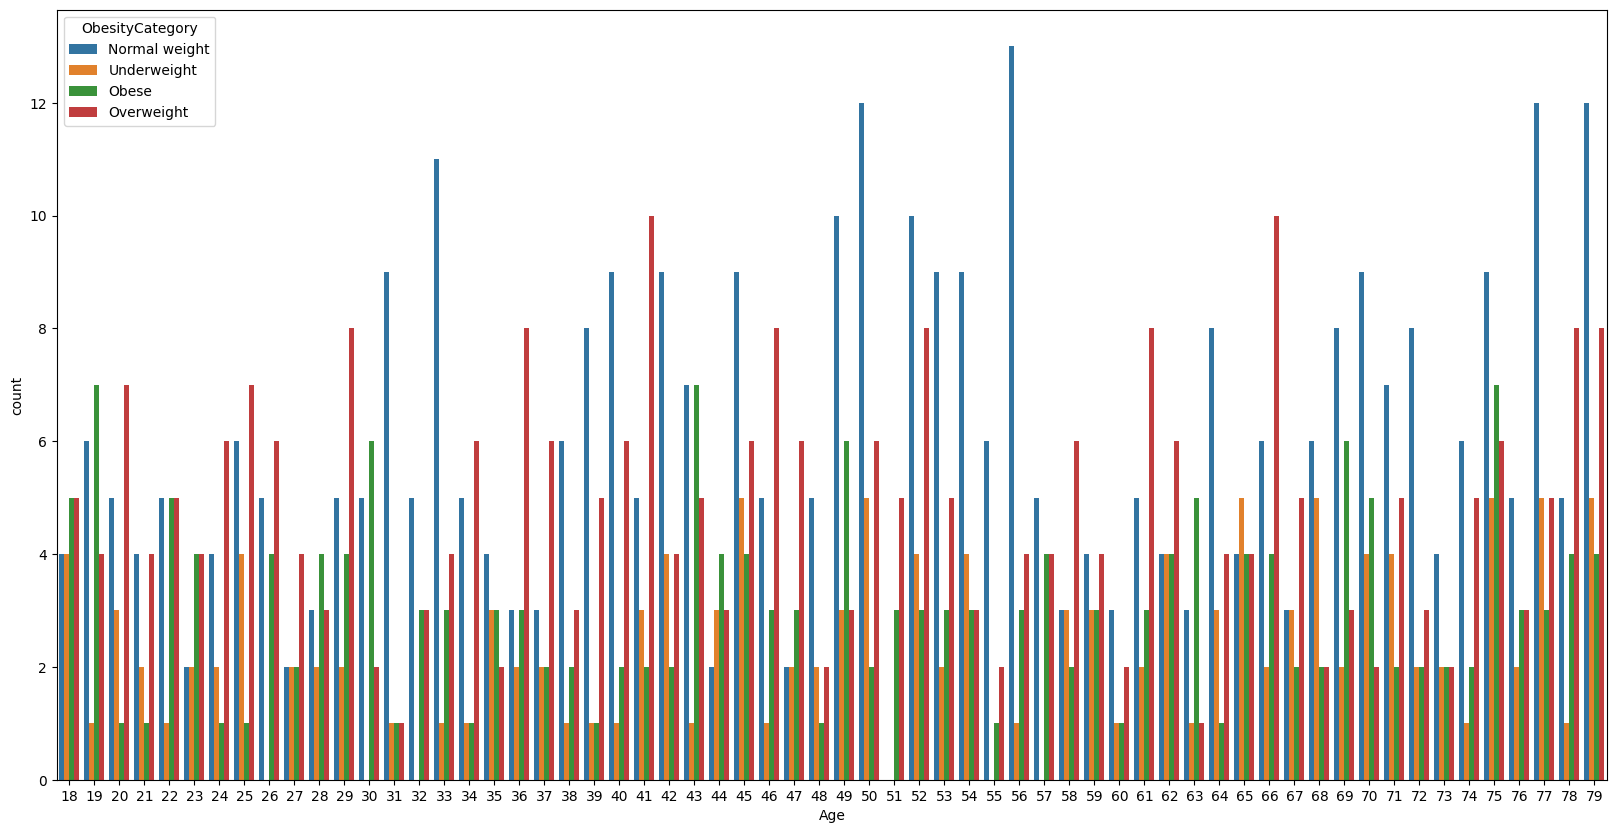

In [165]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Age',hue='ObesityCategory')

<Axes: xlabel='PhysicalActivityLevel', ylabel='count'>

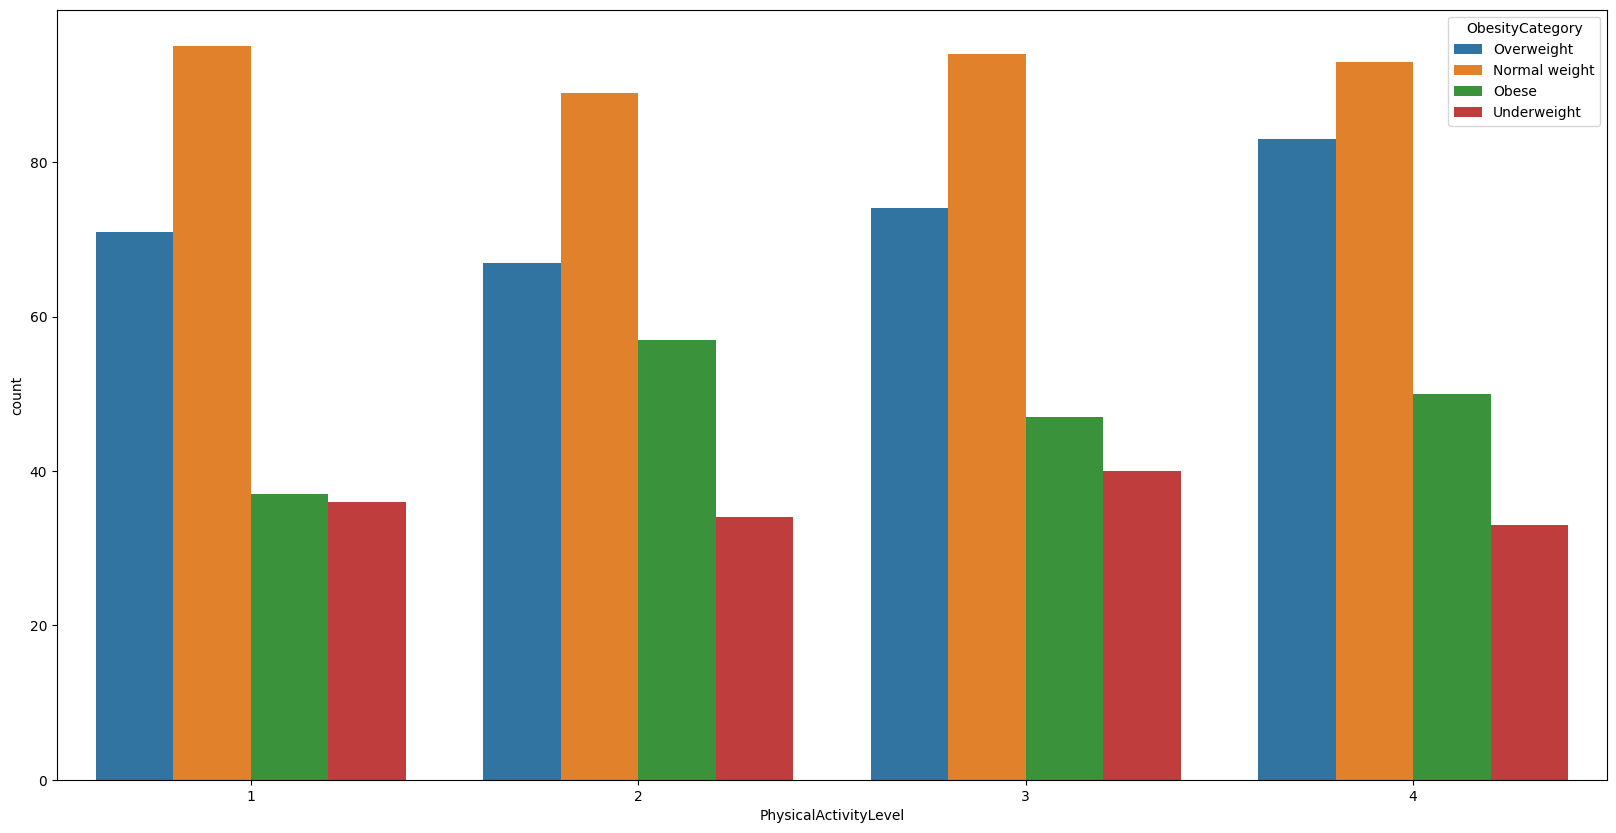

In [166]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='PhysicalActivityLevel',hue='ObesityCategory')

<Axes: xlabel='Gender', ylabel='count'>

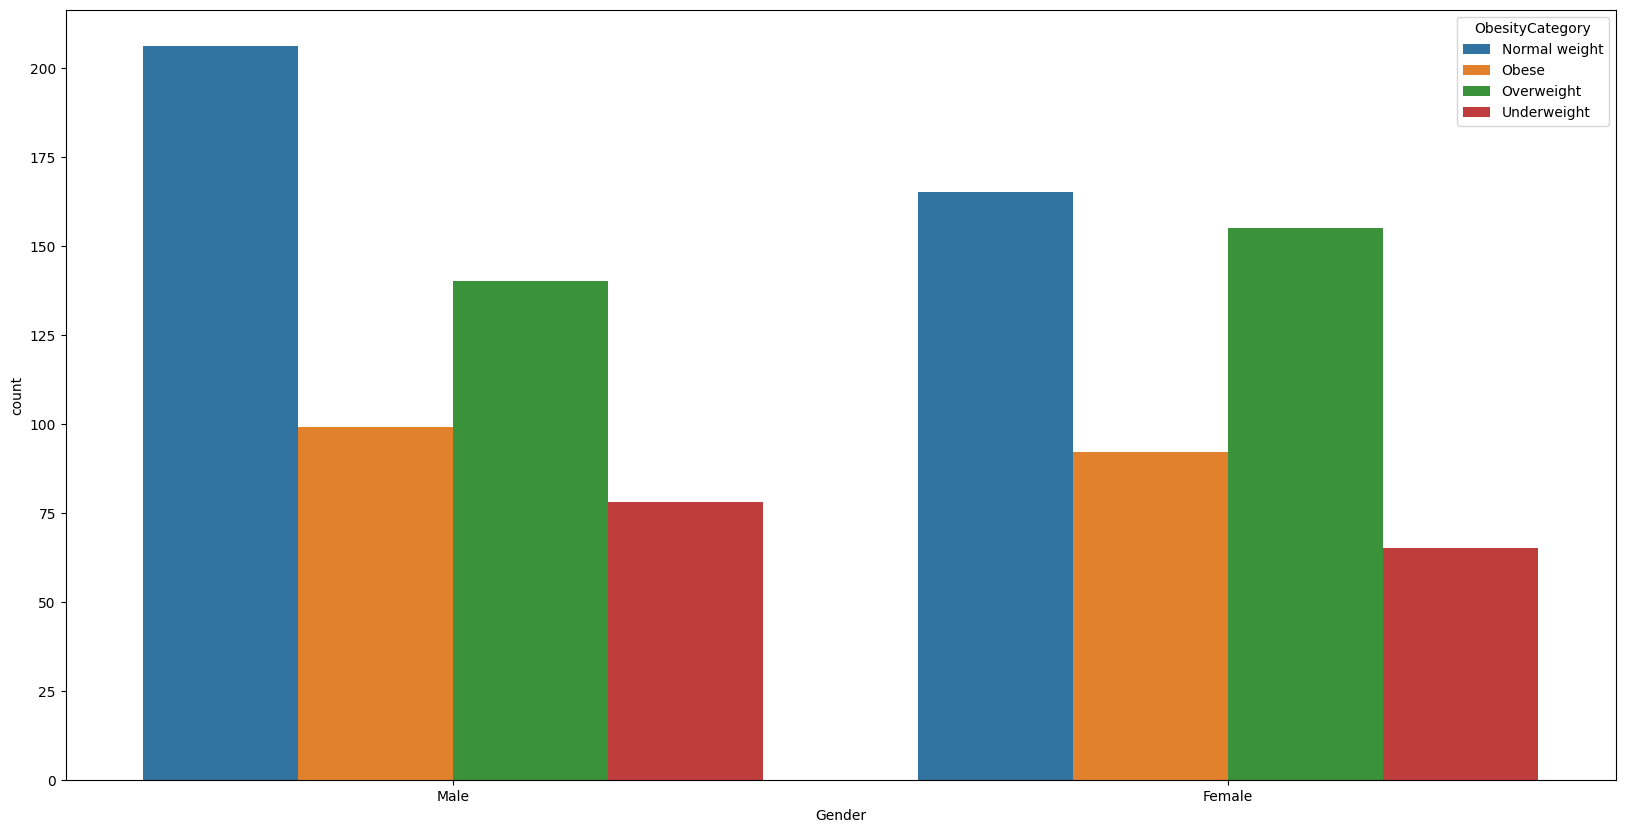

In [167]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Gender',hue='ObesityCategory')

<Axes: ylabel='Count'>

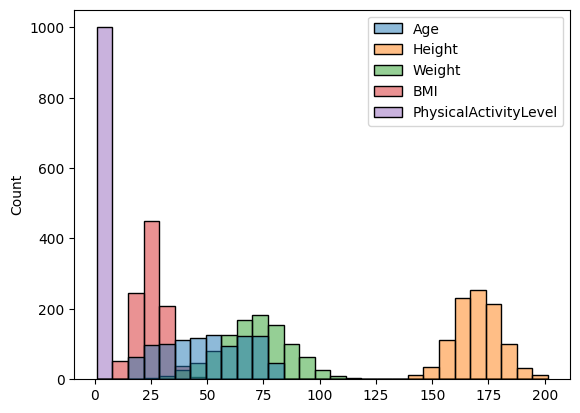

In [168]:
sns.histplot(data=df)

In [169]:
numerical_features = ['Age', 'Height', 'Weight', 'BMI']

print(f'Numerical Features = {len(numerical_features)}')

Numerical Features = 4


In [170]:
corr=df.corr()

<ipython-input-170-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

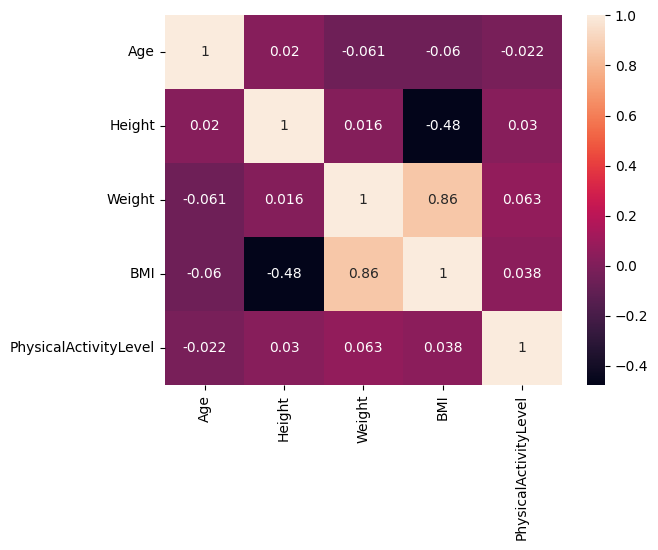

In [171]:
sns.heatmap(corr,annot=True)

In [172]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [173]:
df['Gender'].value_counts()

Male      523
Female    477
Name: Gender, dtype: int64

In [174]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [175]:
df['ObesityCategory'].value_counts()

Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: ObesityCategory, dtype: int64

In [176]:
df['ObesityCategory']=df['ObesityCategory'].map({'Normal weight':1,'Overweight':2,'Obese':3,'Underweight':4})

In [177]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   int64  
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [179]:
y.head()

0    1
1    3
2    2
3    2
4    1
Name: ObesityCategory, dtype: int64

In [180]:
from imblearn.over_sampling import SMOTE

In [181]:
X=df.drop(['ObesityCategory'],axis=1)
y=df['ObesityCategory']

In [182]:
X.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel
0,56,1,173.575262,71.982051,23.891783,4
1,69,1,164.127306,89.959256,33.395209,2
2,46,2,168.072202,72.930629,25.817737,4
3,32,1,168.459633,84.886912,29.912247,3
4,60,1,183.568568,69.038945,20.487903,3


In [183]:
y

0      1
1      3
2      2
3      2
4      1
      ..
995    2
996    3
997    3
998    1
999    1
Name: ObesityCategory, Length: 1000, dtype: int64

In [184]:
smote=SMOTE()
X_resampled,y_resampled =smote.fit_resample(X,y)

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=100)


In [188]:
X_train.shape

(1038, 6)

In [189]:
y_train.shape

(1038,)

In [190]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [191]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial')

In [192]:
lr = LogisticRegression(multi_class = 'multinomial')
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

print(f"Balanced Accuracy Train: {balanced_accuracy_score(y_train, y_pred_train):.4f}")
print(f"Balanced Accuracy Test: {balanced_accuracy_score(y_test, y_pred_test):.4f}")

Balanced Accuracy Train: 0.9865
Balanced Accuracy Test: 0.9711
